<h1><center>LINMA2472 : Porject 2, part 2, Random Fourier Features </center></h1>

Remi Delogne, remi.delogne@uclouvain.be

Import the following packages and functions. Refer to their documentation on the internet for more information on installation and usage.


In [1]:
import numpy as np
import math
import random 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

from keras.datasets import mnist #Contains the dataset
import matplotlib.pyplot as plt
from matplotlib import pyplot


import time #Used to find the execution time of a part of the code

11501568/11490434 [==============================] - 0s 0us/step


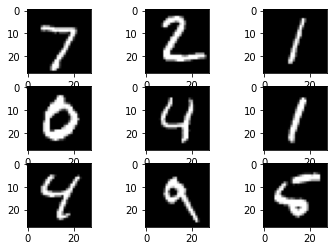

In [2]:
# load dataset and rescale the data to [0,15]
''' load dataset: (we use the larger subset for testing and the smaller 
for training to demonstrate the efficiency of evaluation of new instances)'''
(testX,testy),(trainX,trainy) = mnist.load_data()
#Rescaling
trainX = np.floor(trainX/16)
testX = np.floor(testX/16)

#Plot some images, for fun
for i in range(9):
    pyplot.subplot(330+1+i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

#Put the data in vector form
trainX=trainX.reshape((10000,-1))
testX=testX.reshape((60000,-1))

### Use the *time* package functions to time the execution of parts of your code:

In [3]:
#Example of timing a piece of code
tik=time.perf_counter() # Start
for i in range (100000000):
    i=i+1
tok=time.perf_counter() # Finish
print('Total time: %s' % (tok-tik))

Total time: 11.521982516000207


### Train a linear SVM on the training data and evaluate it on the testing data
Use the tik-tok method to see how long the method takes to evaluate the 60.000 testing instances

Use the accuracy metric to judge the quality of your classifier

In [4]:
#Define the classifier
clfLin=svm.SVC(kernel="linear")
#Train the classifier
clfLin.fit(trainX,trainy)

#Evaluate its accuracy
tik=time.perf_counter() #start time count 
predicted=clfLin.predict(testX)
tok=time.perf_counter() #finish time count 
score=accuracy_score(testy,predicted)
print('Accuracy:%s' % (score))
print('Total time: %s' % (tok-tik))

Accuracy:0.90665
Total time: 71.19023722199927


### Train a Kernel SVM with the Gaussian Kernel on the training data and evaluate it on the testing data
Use the tik-tok method to see how long the method takes to evaluate the $60000$ testing instances

Use the accuracy metric to judge the quality of your classifier

You may stick to the default parameters of sci-kit learn

In [5]:
#Define the classifier
clfKernel=svm.SVC(kernel='rbf')
#Train it
clfKernel.fit(trainX, trainy)
#Use it
tik=time.perf_counter() #start time count 
predicted=clfKernel.predict(testX)
tok=time.perf_counter() #finish time count 
score=accuracy_score(testy,predicted)
print('Accuracy: %s' % (score))
print('Total time: %s' % (tok-tik))

Accuracy: 0.9560833333333333
Total time: 187.74011518500083


### Use the following functions to implement Random Fourier Features

Use the first function to generate your $\boldsymbol\omega_i$ and $b_i$

Use the second function to create the mapping $\boldsymbol z(\boldsymbol x)$ as described in the slides.

In [6]:
def generate_freq(sigma,D):
  #slide 37 says that the fourrier transform of gaussian kernel is approximatly the gaussian distribution # 
  # gaussian distribution can be computed with numpy.random.normal
    mu= 0
    b=[]
    W=[]
    for i in range(D):
      W.append(np.random.normal(mu, sigma, 784))
      b.append(random.random()*math.pi*2)
    return np.array(W),np.array(b)

def rff_gaussian2(x,W,b,D):
    Z=np.cos( x @ W.T + b) * (math.sqrt(2)/D)
    return Z


### Transform your trainX and testX

Use the function you defined to transform your data

Make sure you only generate $\boldsymbol W$ and $\boldsymbol b$ once

Use $\sigma=100$ and $D=300$

You may also use the tik-tok method to time the procedure of creating Random features

In [7]:
W,b=generate_freq(0.01,300)
tik=time.perf_counter() #start time count 
trainX_rff=rff_gaussian2(trainX,W,b,300)
tok=time.perf_counter() #finish time count 
print('Total time: %s' % (tok-tik))
tik=time.perf_counter() #start time count 
testX_rff=rff_gaussian2(testX,W,b,300)
tok=time.perf_counter() #finish time count 
print('Total time: %s' % (tok-tik))

Total time: 0.29570817800049554
Total time: 1.619298028999765


In [8]:
trainX_rff=np.array(trainX_rff)
testX_rff=np.array(testX_rff)

In [9]:
trainX.shape

(10000, 784)

In [10]:
print(f"  trainx of type {type(trainX)}  trainX_rff of type {type(trainX_rff)} \n trainx of shape {trainX.shape}  train_rff of shape {trainX_rff.shape}")

  trainx of type <class 'numpy.ndarray'>  trainX_rff of type <class 'numpy.ndarray'> 
 trainx of shape (10000, 784)  train_rff of shape (10000, 300)


### Use another linear SVM to classify the transformed data

In [11]:
#Define the classifier
clfRff = svm.SVC(kernel="linear",C=np.inf)
#Train it
clfRff.fit(trainX_rff, trainy)
#Use it
tik=time.perf_counter() #start time count 
predicted = clfRff.predict(testX_rff)
tok=time.perf_counter() #finish time count 
score = accuracy_score(testy,predicted)
print('Accuracy: %s' % (score))
print('Total time: %s' % (tok-tik))

Accuracy: 0.8963333333333333
Total time: 22.940672713000822


### Additional workspace 

Testing the accuracy for different values of $D$.

In [12]:
#Define a vector to store the accuracy values you will get
accuracy=[]
train_time=[]
test_time=[]
rff_time=[]
#Define for which values of D you want to test the RFF
try_val=[200,250,300,400,500,1000]
for i in range(6):
    D=try_val[i]
    W,b=generate_freq(0.01,D)

    tik=time.perf_counter() #start time count 
    trainX_rff=rff_gaussian2(trainX,W,b,D)
    tok=time.perf_counter() #finish time count 
    rff_time.append(tok-tik)


    testX_rff=rff_gaussian2(testX,W,b,D)

    #Train and evaluate a linear classifier
    clfRff = svm.SVC(kernel="linear",C=np.inf)

    tik=time.perf_counter() #start time count 
    clfRff.fit(trainX_rff, trainy)
    tok=time.perf_counter() #finish time count 
    train_time.append(tok-tik)

    tik=time.perf_counter() #start time count 
    predicted = clfRff.predict(testX_rff)
    tok=time.perf_counter() #finish time count 
    test_time.append(tok-tik)

    acc = accuracy_score(testy,predicted)
    accuracy.append(acc)

### Don't forget to add plots and other nice things

Text(0.5, 1.0, 'comparision between classifiers')

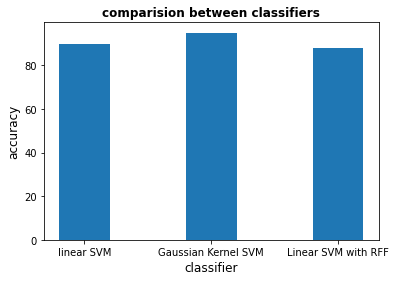

In [13]:
# Q1 compare the time and acc of 3 classifiers 
names= ['linear SVM', 'Gaussian Kernel SVM', 'Linear SVM with RFF']
value= [90, 95, 88]
plt.bar(names,value,width=0.4)
plt.ylabel('accuracy',fontsize=12)
plt.xlabel('classifier',fontsize=12)
plt.title("comparision between classifiers", fontweight='bold')

Text(0.5, 1.0, 'comparision between classifiers')

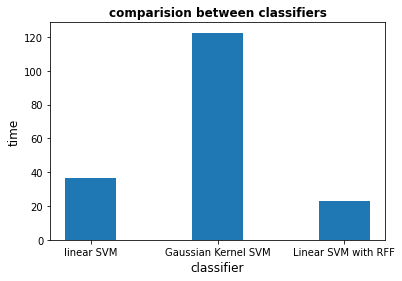

In [14]:
names= ['linear SVM', 'Gaussian Kernel SVM', 'Linear SVM with RFF']
value= [36.41, 122.56, 23.06]
plt.bar(names,value,width=0.4)
plt.ylabel('time',fontsize=12)
plt.xlabel('classifier',fontsize=12)
plt.title("comparision between classifiers", fontweight='bold')

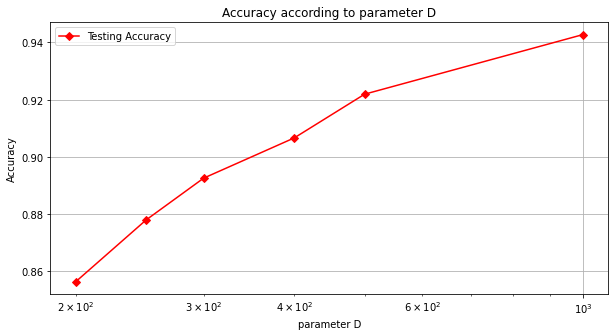

In [15]:
plt.subplots(figsize=(10, 5))
plt.semilogx(try_val, accuracy,'-gD' ,color='red' , label="Testing Accuracy")
#matplot.xticks(L,L)
plt.grid(True)
plt.xlabel("parameter D")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy according to parameter D')
plt.show()

No handles with labels found to put in legend.


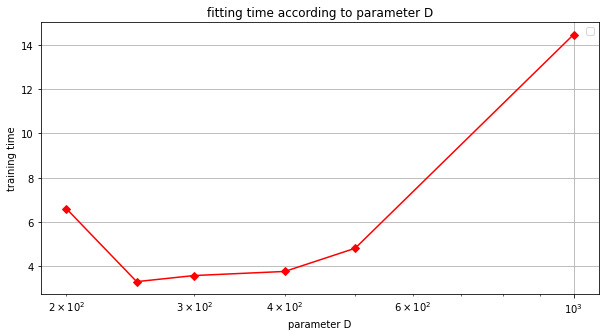

In [16]:
plt.subplots(figsize=(10, 5))
plt.semilogx(try_val, train_time,'-gD' ,color='red')
#matplot.xticks(L,L)
plt.grid(True)
plt.xlabel("parameter D")
plt.ylabel("training time")
plt.legend()
plt.title('fitting time according to parameter D')
plt.show()

No handles with labels found to put in legend.


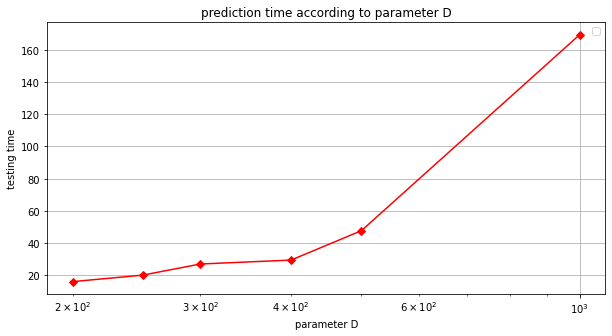

In [17]:
plt.subplots(figsize=(10, 5))
plt.semilogx(try_val, test_time,'-gD' ,color='red')
#matplot.xticks(L,L)
plt.grid(True)
plt.xlabel("parameter D")
plt.ylabel("testing time")
plt.legend()
plt.title('prediction time according to parameter D')
plt.show()

No handles with labels found to put in legend.


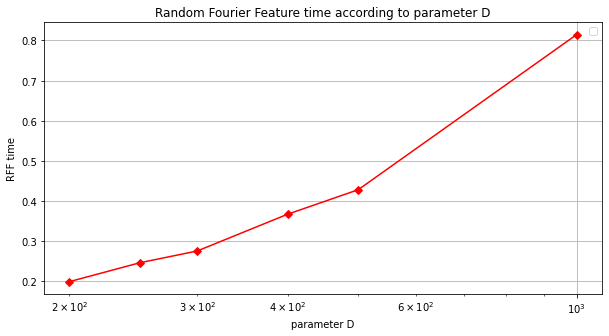

In [18]:
plt.subplots(figsize=(10, 5))
plt.semilogx(try_val, rff_time,'-gD' ,color='red')
#matplot.xticks(L,L)
plt.grid(True)
plt.xlabel("parameter D")
plt.ylabel("RFF time")
plt.legend()
plt.title('Random Fourier Feature time according to parameter D')
plt.show()

In [19]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Project2_part2_update.ipynb')

--2021-11-17 16:26:48--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-11-17 16:26:48 (28.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Project2_part2_update.ipynb to pdf
[NbConvertApp] Support files will be in Project2_part2_update_files/
[NbConvertApp] Making directory ./Project2_part2_update_files
[NbConvertApp] Making directory ./Project2_part2_update_files
[NbConvertApp] Making directory ./Project2_part2_up

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

In [ ]:
try_val=[150,100,75,50]
for i in range(5):
    D=try_val[i]

    print(f" iteration {i} with D= {D}")

    W,b=generate_freq(0.01,D)

    tik=time.perf_counter() #start time count 
    trainX_rff=rff_gaussian2(trainX,W,b,D)
    tok=time.perf_counter() #finish time count 
    print(f" rff time = {tok-tik}")


    testX_rff=rff_gaussian2(testX,W,b,D)

    #Train and evaluate a linear classifier
    clfRff = svm.SVC(kernel="linear",C=np.inf)

    tik=time.perf_counter() #start time count 
    clfRff.fit(trainX_rff, trainy)
    tok=time.perf_counter() #finish time count 
    print(f"train_time = {tok-tik}")

    tik=time.perf_counter() #start time count 
    predicted = clfRff.predict(testX_rff)
    tok=time.perf_counter() #finish time count 
    print(f"test_time = {tok-tik}")

    acc = accuracy_score(testy,predicted)
    print(f" accuracy = {acc}" )
    print("-------------------------------------")

 iteration 0 with D= 200
 rff time = 0.4099537269994471
train_time = 4.699243776000003
test_time = 16.232915295000566
 accuracy = 0.8629333333333333
-------------------------------------
 iteration 1 with D= 150
 rff time = 0.24370581800030777
